# Formatting Labelled Data

In [1]:
import pandas as pd
import numpy as np

In [ ]:
def grab_labelled_data(data_path, label_begins = 98): 
  labelled = pd.read_csv(data_path)
  label_begins = 98

  features = labelled.iloc[:, 2:label_begins] 
  labels = labelled.iloc[:, label_begins:]
  ids = labelled.iloc[:, :2]

  labels.columns = [x[10:] for x in labels.columns]

  features = features.join(ids)
  labels = labels.join(ids)

  features.columns.name = 'Time' 
  labels.columns.name = 'Time'

  features = features.pivot_table(index = ['Student ID', 'Date'])
  labels = labels.pivot_table(index = ['Student ID', 'Date'])

  features = pd.DataFrame(features.stack()).reset_index()
  labels = pd.DataFrame(labels.stack()).reset_index()

  time_stamps = features['Date'] + " " + features['Time']
  time_stamps = pd.to_datetime(time_stamps)

  features['Datetime'] = time_stamps
  labels['Datetime'] = time_stamps

  features = features.drop(columns = ['Date', 'Time'] ) 
  labels = labels.drop(columns = ['Date', 'Time'])

  features = features.pivot_table(index = ['Student ID', 'Datetime']) 
  labels = labels.pivot_table(index = ['Student ID', 'Datetime'])

  features.columns = ['Steps'] 
  labels.columns = ['Asleep']

  labelled_data = features.join(labels * 200)

  return labelled_data 

In [ ]:
labelled = grab_labelled_data('./BMCM_steps_sleep.csv')
labelled[0:20]

Steps  Asleep
Student ID Datetime                          
0          2021-10-01 00:00:00      0       0
           2021-10-01 00:15:00    107       0
           2021-10-01 00:30:00     18       0
           2021-10-01 00:45:00     73       0
           2021-10-01 01:00:00     10       0
           2021-10-01 01:15:00     83       0
           2021-10-01 01:30:00      1     200
           2021-10-01 01:45:00     25     200
           2021-10-01 02:00:00      9     200
           2021-10-01 02:15:00      8     200
           2021-10-01 02:30:00     26     200
           2021-10-01 02:45:00     14     200
           2021-10-01 03:00:00      1     200
           2021-10-01 03:15:00      0     200
           2021-10-01 03:30:00      2     200
           2021-10-01 03:45:00     75     200
           2021-10-01 04:00:00      1     200
           2021-10-01 04:15:00     37     200
           2021-10-01 04:30:00     22     200
           2021-10-01 04:45:00      6     200

In [ ]:
def grab_unlabelled_data(data_path): 
  unlabelled = pd.read_csv(data_path) 
  unlabelled = unlabelled.pivot_table(index = ['Student ID', 'Date'])
  unlabelled.columns.name = 'Time'
  unlabelled = pd.DataFrame(unlabelled.stack())
  unlabelled = unlabelled.reset_index()
  unlabelled['Datetime'] = pd.to_datetime(unlabelled['Date'] + ' ' + unlabelled['Time'])
  unlabelled = unlabelled.drop(columns = ['Date', 'Time'])
  unlabelled = unlabelled.pivot_table(index = ['Student ID', 'Datetime'])
  unlabelled.columns = ['Steps']

  return unlabelled 

In [ ]:
unlabelled = grab_unlabelled_data('./BMCM_steps.csv')
unlabelled[0:50]

Steps
Student ID Datetime                  
100        2021-10-01 00:00:00     67
           2021-10-01 00:15:00     20
           2021-10-01 00:30:00      0
           2021-10-01 00:45:00      0
           2021-10-01 01:00:00      3
           2021-10-01 01:15:00      7
           2021-10-01 01:30:00    128
           2021-10-01 01:45:00     16
           2021-10-01 02:00:00      1
           2021-10-01 02:15:00   2500
           2021-10-01 02:30:00   2500
           2021-10-01 02:45:00   2500
           2021-10-01 03:00:00     32
           2021-10-01 03:15:00      5
           2021-10-01 03:30:00      6
           2021-10-01 03:45:00     13
           2021-10-01 04:00:00     85
           2021-10-01 04:15:00      8
           2021-10-01 04:30:00      6
           2021-10-01 04:45:00      1
           2021-10-01 05:00:00     21
           2021-10-01 05:15:00     45
           2021-10-01 05:30:00      2
           2021-10-01 05:45:00     64
           2021-10-01 06:00:00     25
           2021-10-01 06:15:00     22
           2021-10-01 06:30:00     21
           2021-10-01 06:45:00     35
           2021-10-01 07:00:00     49
           2021-10-01 07:15:00     12
           2021-10-01 07:30:00      2
           2021-10-01 07:45:00     23
           2021-10-01 08:00:00     17
           2021-10-01 08:15:00     12
           2021-10-01 08:30:00     12
           2021-10-01 08:45:00     30
           2021-10-01 09:00:00     13
           2021-10-01 09:15:00    110
           2021-10-01 09:30:00     37
           2021-10-01 09:45:00      0
           2021-10-01 10:00:00    318
           2021-10-01 10:15:00      2
           2021-10-01 10:30:00      9
           2021-10-01 10:45:00     46
           2021-10-01 11:00:00      0
           2021-10-01 11:15:00     87
           2021-10-01 11:30:00     18
           2021-10-01 11:45:00      5
           2021-10-01 12:00:00      7
           2021-10-01 12:15:00    149

In [ ]:
np.shape(unlabelled)

(1190400, 1)

In [ ]:
import tensorflow as tf
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
win = 16
inputs = as_strided(labelled['Steps'], (len(labelled) - (win - 1), win), (labelled['Steps'].values.strides * 2))
inputs = np.log(np.array(inputs) + 1)
inputs = tf.convert_to_tensor(inputs)
np.shape(inputs)

TensorShape([297585, 16])

In [ ]:
inputs[0:5]

<tf.Tensor: shape=(5, 16), dtype=float64, numpy=
array([[0.        , 4.68213123, 2.94443898, 4.30406509, 2.39789527,
        4.4308168 , 0.69314718, 3.25809654, 2.30258509, 2.19722458,
        3.29583687, 2.7080502 , 0.69314718, 0.        , 1.09861229,
        4.33073334],
       [4.68213123, 2.94443898, 4.30406509, 2.39789527, 4.4308168 ,
        0.69314718, 3.25809654, 2.30258509, 2.19722458, 3.29583687,
        2.7080502 , 0.69314718, 0.        , 1.09861229, 4.33073334,
        0.69314718],
       [2.94443898, 4.30406509, 2.39789527, 4.4308168 , 0.69314718,
        3.25809654, 2.30258509, 2.19722458, 3.29583687, 2.7080502 ,
        0.69314718, 0.        , 1.09861229, 4.33073334, 0.69314718,
        3.63758616],
       [4.30406509, 2.39789527, 4.4308168 , 0.69314718, 3.25809654,
        2.30258509, 2.19722458, 3.29583687, 2.7080502 , 0.69314718,
        0.        , 1.09861229, 4.33073334, 0.69314718, 3.63758616,
        3.13549422],
       [2.39789527, 4.4308168 , 0.69314718, 3.25809

In [ ]:
as_strided_un = np.lib.stride_tricks.as_strided
inputs_un = as_strided_un(unlabelled['Steps'], (len(unlabelled) - (win - 1), win), (unlabelled['Steps'].values.strides * 2))
inputs_un = np.log(np.array(inputs_un) + 1)
inputs_un = tf.convert_to_tensor(inputs_un)
np.shape(inputs_un)

TensorShape([1190385, 16])

In [ ]:
labels = labelled['Asleep'][int(win/2):(297600-int(win/2)+1)].to_numpy()
labels = labels.reshape(297600-win+1)
labels = np.array(labels) / 200
labels = tf.one_hot(labels, 2)
np.shape(labels)

TensorShape([297585, 2])

In [ ]:
labels[0:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [ ]:
from keras.layers import LeakyReLU
model = tf.keras.Sequential(
  [
      tf.keras.layers.Reshape(input_shape=(win, ), target_shape=(win, 1)),
      
      tf.keras.layers.Conv1D(kernel_size=3, filters=3, padding='valid', name='conv1'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.LeakyReLU(alpha=0.05),
      #tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv1D(kernel_size=6, filters=3, padding='valid', name='conv2'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.LeakyReLU(alpha=0.03),
      #tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv1D(kernel_size=8, filters=6, padding='valid', name='conv3'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.LeakyReLU(alpha=0.03),
      #tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Flatten(),
      
      
      tf.keras.layers.Dense(30, use_bias=False, name='jack'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.LeakyReLU(alpha=0.03),
      #tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(2, activation='softmax', name='jill')
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.AUC(curve='PR')])

# print model layers
model.summary()

# lr decay function
#def lr_decay(epoch):
#  return 0.01 * math.pow(0.666, epoch)

# lr schedule callback
#lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

BATCH_SIZE = 200
EPOCHS = 10
history = model.fit(x=inputs, y=labels, epochs=EPOCHS, steps_per_epoch=297585//BATCH_SIZE,
                    validation_split=0.25)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 16, 1)             0         
                                                                 
 conv1 (Conv1D)              (None, 14, 3)             12        
                                                                 
 batch_normalization (BatchN  (None, 14, 3)            9         
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 3)             0         
                                                                 
 conv2 (Conv1D)              (None, 9, 3)              57        
                                                                 
 batch_normalization_1 (Batc  (None, 9, 3)             9         
 hNormalization)                                        

In [ ]:
labels_un = model.call(inputs_un)
np.shape(labels_un)

TensorShape([1190385, 2])

In [ ]:
pred_labels_un = np.argmax(labels_un, axis=1)
pred_labels_un[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
unlabelled['Asleep'] = ([0.0]*8) + pred_labels_un.tolist() + ([0.0]*7)
unlabelled[0:20]

Steps  Asleep
Student ID Datetime                          
100        2021-10-01 00:00:00     67     0.0
           2021-10-01 00:15:00     20     0.0
           2021-10-01 00:30:00      0     0.0
           2021-10-01 00:45:00      0     0.0
           2021-10-01 01:00:00      3     0.0
           2021-10-01 01:15:00      7     0.0
           2021-10-01 01:30:00    128     0.0
           2021-10-01 01:45:00     16     0.0
           2021-10-01 02:00:00      1     0.0
           2021-10-01 02:15:00   2500     0.0
           2021-10-01 02:30:00   2500     0.0
           2021-10-01 02:45:00   2500     0.0
           2021-10-01 03:00:00     32     1.0
           2021-10-01 03:15:00      5     1.0
           2021-10-01 03:30:00      6     1.0
           2021-10-01 03:45:00     13     1.0
           2021-10-01 04:00:00     85     1.0
           2021-10-01 04:15:00      8     1.0
           2021-10-01 04:30:00      6     1.0
           2021-10-01 04:45:00      1     1.0

In [ ]:
unlabelled.to_csv("unlabelled_CNN.csv")

In [ ]:
pred = model.call(inputs)
pred

<tf.Tensor: shape=(297585, 2), dtype=float32, numpy=
array([[0.14125167, 0.8587483 ],
       [0.10826038, 0.8917396 ],
       [0.09595458, 0.90404534],
       ...,
       [0.9053359 , 0.09466405],
       [0.9424062 , 0.05759384],
       [0.8739371 , 0.12606291]], dtype=float32)>

In [ ]:
pos_pred = pred[:,1]
neg_pred = pred[:,0]

In [ ]:
norm_labels = tf.argmax(labels, axis=1)
norm_labels

<tf.Tensor: shape=(297585,), dtype=int64, numpy=array([1, 1, 1, ..., 0, 0, 0])>

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(norm_labels, pos_pred)
metrics.auc(fpr, tpr)

0.9755240988922245

No handles with labels found to put in legend.


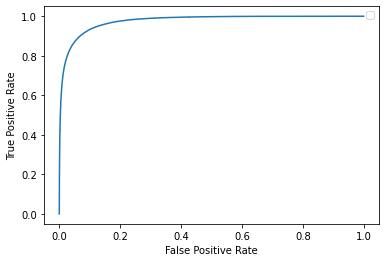

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
pred_labels = np.argmax(pred,axis=1)
pred_labels

array([1, 1, 1, ..., 0, 0, 0])

No handles with labels found to put in legend.


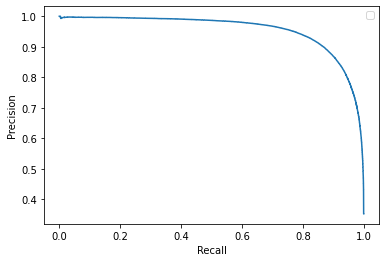

In [ ]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(norm_labels, pos_pred)
lr_f1, lr_auc = metrics.f1_score(norm_labels, pred_labels), metrics.auc(lr_recall, lr_precision)
# plot the precision-recall curves
plt.plot(lr_recall, lr_precision)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
labelled['Pred_Asleep'] = ([0.0]*8) + pred_labels.tolist() + ([0.0]*7)
labelled[0:20]

Steps  Asleep  Pred_Asleep
Student ID Datetime                                       
0          2021-10-01 00:00:00      0       0          0.0
           2021-10-01 00:15:00    107       0          0.0
           2021-10-01 00:30:00     18       0          0.0
           2021-10-01 00:45:00     73       0          0.0
           2021-10-01 01:00:00     10       0          0.0
           2021-10-01 01:15:00     83       0          0.0
           2021-10-01 01:30:00      1     200          0.0
           2021-10-01 01:45:00     25     200          0.0
           2021-10-01 02:00:00      9     200          1.0
           2021-10-01 02:15:00      8     200          1.0
           2021-10-01 02:30:00     26     200          1.0
           2021-10-01 02:45:00     14     200          1.0
           2021-10-01 03:00:00      1     200          1.0
           2021-10-01 03:15:00      0     200          1.0
           2021-10-01 03:30:00      2     200          1.0
           2021-10-01 03:45:00     75     200          1.0
           2021-10-01 04:00:00      1     200          1.0
           2021-10-01 04:15:00     37     200          1.0
           2021-10-01 04:30:00     22     200          1.0
           2021-10-01 04:45:00      6     200          1.0

In [ ]:
labelled.to_csv("labelled_CNN.csv")

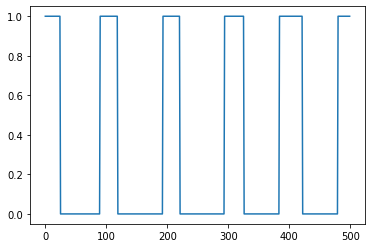

In [ ]:
import pandas as pd
pred_pd = pd.DataFrame(pred_labels, columns = ['labels'])
pred_pd['labels'][0:500].plot()

In [ ]:
pred_pd

,labels
0,1
1,1
2,1
3,1
4,1
...,...
297580,0
297581,0
297582,0
297583,0


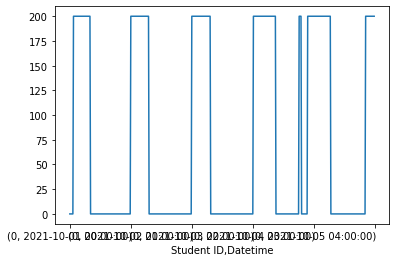

In [ ]:
labelled['Asleep'][0:500].plot()

In [ ]:
labelled['Asleep'] = labelled['Asleep']/200

In [ ]:
labelled['Asleep'].loc[0].iloc[1000+int(win/2):1000+300+int(win/2)]

Datetime
2021-10-11 12:00:00    1.0
2021-10-11 12:15:00    1.0
2021-10-11 12:30:00    0.0
2021-10-11 12:45:00    0.0
2021-10-11 13:00:00    0.0
                      ... 
2021-10-14 13:45:00    0.0
2021-10-14 14:00:00    0.0
2021-10-14 14:15:00    0.0
2021-10-14 14:30:00    0.0
2021-10-14 14:45:00    0.0
Name: Asleep, Length: 300, dtype: float64

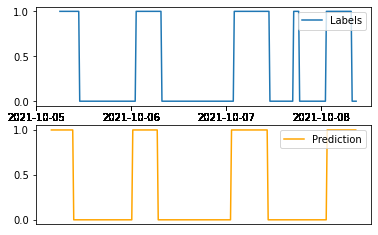

In [ ]:
shift = 400
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(labelled['Asleep'].loc[0].iloc[shift+int(win/2):shift+300+int(win/2)], label = 'Labels') 
ax1.legend()

xs = [x.date() for x in labelled.loc[0].iloc[shift+int(win/2):shift+300+int(win/2)].index]
plt.setp((ax1, ax2), xticks = xs)
ax2.plot(pred_pd['labels'].iloc[shift:shift+300], color = 'orange', label = 'Prediction')
ax2.legend()

plt.show()

In [ ]:
model.layers[7].get_weights()[0]

array([[[ 0.033219  ,  0.00926279, -0.30509555,  0.3031689 ,
          0.12737398, -0.11447567],
        [ 0.02120811,  0.17866702, -0.09264799, -0.04438192,
         -0.0272971 , -0.22443181],
        [ 0.13040839,  0.18379453, -0.0607722 , -0.20405023,
          0.22714493, -0.2379397 ]],

       [[ 0.08942334, -0.16717342,  0.00084302, -0.21627693,
         -0.30197296,  0.04402468],
        [ 0.21389262,  0.03621052, -0.10902117, -0.02727094,
         -0.22915165, -0.34249228],
        [-0.16426757,  0.1065287 ,  0.12621917, -0.03048858,
         -0.7578642 ,  0.11931543]],

       [[-0.05621313, -0.20503381,  0.17171739,  0.09239515,
          0.24432583,  0.12234473],
        [ 0.09079352,  0.36680612,  0.01427012,  0.07512495,
         -0.14655481, -0.13487187],
        [-0.07127342, -0.05879804,  0.3524999 , -0.22273794,
         -0.23474169,  0.15830831]],

       [[-0.5945802 ,  0.3493952 ,  0.27665347,  0.18976496,
          0.14994526,  0.10149924],
        [-0.30755317, -0

In [ ]:
filters = np.array(model.layers[4].get_weights()[0])
# normalize filter values to 0-1 so we can visualize them
f_min = np.min(filters)
f_max = np.max(filters)
filters = (filters - f_min) / (f_max - f_min)
np.shape(filters)

(6, 3, 3)

(6, 3)
(6, 3)
(6, 3)


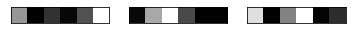

In [ ]:

# plot first few filters
n_filters = 3
ix = 1
for i in range(n_filters):
  # get the filter
  f = filters[:, :, i]
  print(np.shape(f))
  # plot each channel separately
  for j in range(1):
    # specify subplot and turn of axis
    ax = plt.subplot(n_filters, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    current = np.reshape(f[:, j], (1, 6))
    plt.imshow(current, cmap='gray')
    ix += 1
# show the figure
plt.show()


In [ ]:
labelled[0:50]

Steps  Asleep
Student ID Datetime                          
0          2021-10-01 00:00:00      0     0.0
           2021-10-01 00:15:00    107     0.0
           2021-10-01 00:30:00     18     0.0
           2021-10-01 00:45:00     73     0.0
           2021-10-01 01:00:00     10     0.0
           2021-10-01 01:15:00     83     0.0
           2021-10-01 01:30:00      1     1.0
           2021-10-01 01:45:00     25     1.0
           2021-10-01 02:00:00      9     1.0
           2021-10-01 02:15:00      8     1.0
           2021-10-01 02:30:00     26     1.0
           2021-10-01 02:45:00     14     1.0
           2021-10-01 03:00:00      1     1.0
           2021-10-01 03:15:00      0     1.0
           2021-10-01 03:30:00      2     1.0
           2021-10-01 03:45:00     75     1.0
           2021-10-01 04:00:00      1     1.0
           2021-10-01 04:15:00     37     1.0
           2021-10-01 04:30:00     22     1.0
           2021-10-01 04:45:00      6     1.0
           2021-10-01 05:00:00      9     1.0
           2021-10-01 05:15:00     18     1.0
           2021-10-01 05:30:00     63     1.0
           2021-10-01 05:45:00     17     1.0
           2021-10-01 06:00:00      5     1.0
           2021-10-01 06:15:00     72     1.0
           2021-10-01 06:30:00     19     1.0
           2021-10-01 06:45:00     78     1.0
           2021-10-01 07:00:00     99     1.0
           2021-10-01 07:15:00     11     1.0
           2021-10-01 07:30:00      6     1.0
           2021-10-01 07:45:00      3     1.0
           2021-10-01 08:00:00     18     1.0
           2021-10-01 08:15:00     13     1.0
           2021-10-01 08:30:00     35     0.0
           2021-10-01 08:45:00      0     0.0
           2021-10-01 09:00:00    257     0.0
           2021-10-01 09:15:00     28     0.0
           2021-10-01 09:30:00     65     0.0
           2021-10-01 09:45:00      0     0.0
           2021-10-01 10:00:00      0     0.0
           2021-10-01 10:15:00      0     0.0
           2021-10-01 10:30:00     79     0.0
           2021-10-01 10:45:00    100     0.0
           2021-10-01 11:00:00      0     0.0
           2021-10-01 11:15:00     17     0.0
           2021-10-01 11:30:00     20     0.0
           2021-10-01 11:45:00      0     0.0
           2021-10-01 12:00:00     58     0.0
           2021-10-01 12:15:00      5     0.0

In [ ]:

from vis.visualization import visualize_saliency
from vis.utils import utils

# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'jill')

# Swap softmax with linear
model.layers[layer_index].activation = activations.linear
model = utils.apply_modifications(model)  

# Numbers to visualize
indices_to_visualize = [0]

# Visualize
for index_to_visualize in indices_to_visualize:
  # Get input
  input_image = input[index_to_visualize]
  input_class = np.argmax(labels[index_to_visualize])
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Generate visualization
  visualization = visualize_saliency(model, layer_index, filter_indices=input_class, seed_input=input_image)
  axes[0].imshow(input_image[..., 0]) 
  axes[0].set_title('Original image')
  axes[1].imshow(visualization)
  axes[1].set_title('Saliency map')
  fig.suptitle('target = {input_class}')
  plt.show()

ImportError: ignored